<a href="https://colab.research.google.com/github/mechamrit/ML-Predict-Punjabi-Song/blob/master/Copy_of_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punjabi Song Generator Using ML(Small Dataset)
Trying to generate some lyrics given some text.

In [0]:
## Importing Libararies
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import os 
!pip install -q pyyaml h5py

In [4]:
## Connecting with Drive to copy data and saving weights after training
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
!cp /content/drive/My\ Drive/Data/small.txt /content/

In [7]:
## Reading Txt File
data = open('small.txt').read()
data[:200]

'Akhiyan de samne, akhiyan de khwaab\nTutti jande ne, tutti jande ne\nTere jaan baad dard behisaab\nTadpaande ne, tadpaande ne\n\nYaad teri lai ke\nSeene vich beh ke\nYaad teri lai ke\nSeene vich beh ke\nDil ro'

In [8]:
## Dividing data to train for each sentence 
## Creating Corpus
corpus = data.lower().split("\n")
print(corpus)
len(corpus)


['akhiyan de samne, akhiyan de khwaab', 'tutti jande ne, tutti jande ne', 'tere jaan baad dard behisaab', 'tadpaande ne, tadpaande ne', '', 'yaad teri lai ke', 'seene vich beh ke', 'yaad teri lai ke', 'seene vich beh ke', 'dil royi janda ae', '', 'mera mehboob kise hor da', 'hoyi janda ae', 'mera mehboob kise hor da', 'hoyi janda ae', '', 'hoyi jaanda ae... aa...', '', 'eh jo doori ae', 'teri majboori ae', 'yaa hai teri marzi', 'rab jaaneya tu', 'hai thukraai kyun', 'mere ishqe de arzi', '', 'haan.. eh jo doori ae', 'teri majboori ae', 'yaa hai teri marzi', 'rabb janeya tu', 'hai thukrai kyun', 'mere ishqe de arzi', '', 'tere aake qareeb mera jageya naseeb', 'tere aake qareeb mera jageya naseeb', 'kyun soyi jaanda ae', '', 'mera mehboob kise hor da', 'hoyi janda ae', 'mera mehboob kise hor da', 'hoyi janda aeve main taan tere utte senti hoi bahli firdi', 'kadey kisey nu na ditta siga bhaa chann ve', 'kisey nu na ditta siga bhaa chann ve', 'kisey nu na ditta siga bhaa chann ve', '', 've

8042

In [9]:
## Tokenizing 
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print("Dataset has {} words".format(total_words))



Dataset has 6159 words


In [0]:
## Creating input Seqence using list of tokens
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequences = token_list[:i+1]
    input_sequences.append(n_gram_sequences)


In [11]:
## Padding as per the longest sentence in the corpus
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
input_sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = tf.keras.utils.to_categorical(label, num_classes=total_words)

29


In [12]:
## Model
## Number of classes will be the number of words
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

model = tf.keras.models.Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(250, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(150))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 28, 100)           615900    
_________________________________________________________________
bidirectional (Bidirectional (None, 28, 500)           702000    
_________________________________________________________________
dropout (Dropout)            (None, 28, 500)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               390600    
_________________________________________________________________
dense (Dense)                (None, 3079)              464929    
_________________________________________________________________
dense_1 (Dense)              (None, 6159)              18969720  
Total params: 21,143,149
Trainable params: 21,143,149
Non-trainable params: 0
____________________________________________

In [0]:
## Saving the Model in GDRIVE using callbacks
import os

checkpoint_path = "/content/drive/My Drive/CopyOfModel1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [14]:
## Training the Model
history = model.fit(predictors, label, epochs=100, verbose=1,callbacks=[cp_callback])

Train on 31162 samples
Epoch 1/100
31136/31162 [============================>.] - ETA: 0s - loss: 7.4440 - accuracy: 0.0179
Epoch 00001: saving model to /content/drive/My Drive/CopyOfModel1/cp.ckpt
31162/31162 [==============================] - 63s 2ms/sample - loss: 7.4436 - accuracy: 0.0179
Epoch 2/100
31136/31162 [============================>.] - ETA: 0s - loss: 7.0359 - accuracy: 0.0226
Epoch 00002: saving model to /content/drive/My Drive/CopyOfModel1/cp.ckpt
31162/31162 [==============================] - 51s 2ms/sample - loss: 7.0353 - accuracy: 0.0227
Epoch 3/100
31136/31162 [============================>.] - ETA: 0s - loss: 6.8594 - accuracy: 0.0264
Epoch 00003: saving model to /content/drive/My Drive/CopyOfModel1/cp.ckpt
31162/31162 [==============================] - 51s 2ms/sample - loss: 6.8593 - accuracy: 0.0264
Epoch 4/100
31136/31162 [============================>.] - ETA: 0s - loss: 6.7003 - accuracy: 0.0293
Epoch 00004: saving model to /content/drive/My Drive/CopyOfMode

In [0]:
## Loads the weights
# model.load_weights(checkpoint_path)

# Re-evaluate the model
# loss,acc = model.evaluate(test_images,  test_labels, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100*acc))


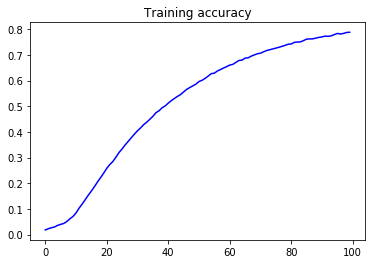

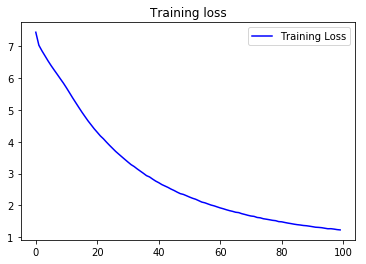

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [28]:
seed_text = "dill da mamla hai"
next_words = 100

from tensorflow.keras.preprocessing.sequence import pad_sequences

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)
## Model prediction is not as expected

dill da mamla hai vaari mili si tu ve aa doon vaar da baahle chill ne canada te haan ni kal ve gaya ve kivein out of control zora bhubb paani andar hoke bar chup paani pulling warga chup nichod laake di aa ek akk maade naam warga chup ae jutti di chup ae warga ae warga chup paani chup paani iraadeyan de paani raja beast kahlon warga ae warga thodde warga thodde nai jaye saari mere paani bukal warga ae roop sawaar lavaan lainde si warga aa chhad duga paani raja khel zindagi ni main thatiyan banne’aan bharti bethi nu lalkaare warga ae


In [0]:

!pip install -q pyyaml h5py  # Required to save models in HDF5 format
## Saving the model in Gdrive
model.save('my_model_LSTM.h5') 


In [0]:
!cp my_model_LSTM.h5 /content/drive/My\ Drive/Project\ Punjabi\ Song/